In [1]:
# Formação Cientista de Dados - Fernando Amaral e Jones Granatyr
# Deep Learning

In [2]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
#from keras.utils import np_utils
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
#pip install tensorflow (executar no Anaconda Prompt)

Text(0.5, 1.0, '0')

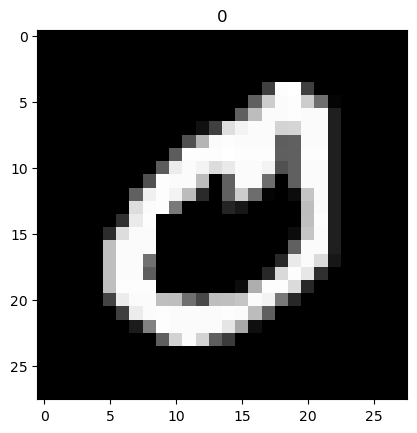

In [3]:
# Obtenção dos dados e divisão automática entre treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
# Visualização de imagens específicas
plt.imshow(X_treinamento[21], cmap = 'gray')
plt.title(y_treinamento[21])

In [4]:
# Mudança de dimensão, originalmente está em 28x28 e precisamos 784
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [5]:
# Transformação dos dados para float para podermos normalizar os dados
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [6]:
# Normalização (255 é o valor máximo de um pixel)
X_treinamento /= 255
X_teste /= 255

In [7]:
# Transformação para o formato dummy (temos 10 classes)
#y_treinamento = np_utils.to_categorical(y_treinamento, 10)
#y_teste = np_utils.to_categorical(y_teste, 10)
y_treinamento = to_categorical(y_treinamento, 10)
y_teste = to_categorical(y_teste, 10)

y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [8]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting
# input_dim = 784 pq temos uma matriz 28x28 que é transformada em um vetor, 784 vetores que vão entrar na rede neural
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
#camada de saida, softmax probabilidade
# units = 10, são 10 caracteres que queremos prever (de 0 a 9)
modelo.add(Dense(units = 10, activation = 'softmax'))

E:\Users\diego\anaconda3\envs\ds_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Visualização da estrutura da rede neural
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,210 (231.29 KB)

 Trainable params: 59,210 (231.29 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
# Na variável historico temos os histórico das execuções (erro e accuracy)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 20,
                       validation_data = (X_teste, y_teste))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7452 - loss: 0.7730 - val_accuracy: 0.9488 - val_loss: 0.1692
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9285 - loss: 0.2449 - val_accuracy: 0.9575 - val_loss: 0.1464
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9436 - loss: 0.1923 - val_accuracy: 0.9639 - val_loss: 0.1229
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9501 - loss: 0.1728 - val_accuracy: 0.9668 - val_loss: 0.1183
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9574 - loss: 0.1497 - val_accuracy: 0.9680 - val_loss: 0.1072
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9577 - loss: 0.1476 - val_accuracy: 0.9707 - val_loss: 0.1026
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9593 - loss: 0.1357 - val_accuracy: 0.9727 - val_loss: 0.0938
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9635 - loss: 0.12

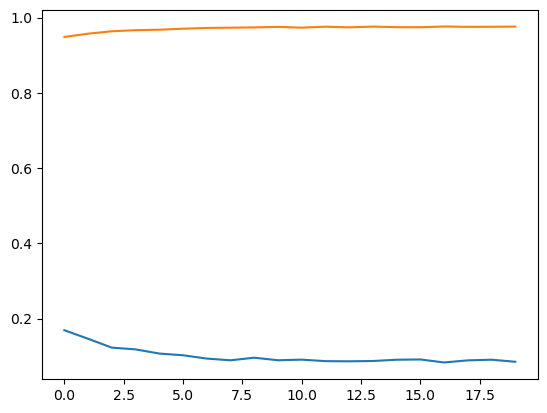

In [11]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['val_loss'])
#performance da rede
plt.plot(historico.history['val_accuracy'])
# Linha azul mostra a evolução do erro

In [12]:
# Obtenção das previsões 
previsoes = modelo.predict(X_teste)
previsoes

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[3.9483514e-11, 5.8280802e-06, 8.1016267e-08, ..., 9.9998200e-01,
        8.8555552e-11, 9.5545647e-06],
       [1.9213706e-09, 6.1035046e-04, 9.9938369e-01, ..., 5.1901156e-07,
        2.0873453e-07, 5.1799806e-12],
       [6.2527733e-10, 9.9998403e-01, 1.4667171e-07, ..., 8.3481964e-06,
        6.9841790e-06, 1.1145993e-08],
       ...,
       [2.4670928e-08, 5.2798267e-08, 3.4134038e-07, ..., 1.2924288e-05,
        1.5403768e-07, 1.2845614e-04],
       [3.8499603e-11, 8.9152080e-13, 3.5411776e-12, ..., 3.5640330e-12,
        4.2012096e-09, 2.6478675e-08],
       [2.5549783e-11, 2.0481592e-16, 6.6516129e-15, ..., 5.2532442e-19,
        3.4617600e-12, 1.1887209e-16]], dtype=float32)

In [13]:
# valor máximo (com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 972,    0,    1,    0,    0,    1,    3,    1,    1,    1],
       [   0, 1126,    1,    1,    0,    0,    2,    1,    4,    0],
       [   3,    2, 1008,    1,    4,    0,    1,    6,    7,    0],
       [   0,    0,    5,  976,    0,    9,    0,   10,    8,    2],
       [   1,    0,    0,    0,  969,    0,    3,    0,    1,    8],
       [   2,    0,    0,    4,    2,  866,    6,    2,    6,    4],
       [   6,    3,    1,    0,    4,    6,  934,    0,    4,    0],
       [   2,    4,   13,    1,    0,    0,    0, 1003,    0,    5],
       [   5,    2,    3,    4,    4,    2,    4,    4,  939,    7],
       [   4,    5,    0,    6,   14,    2,    0,    7,    1,  970]],
      dtype=int64)

In [14]:
# Previsão com um novo registro, convertendo o array para o formato de matriz
#número 4
y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [15]:
#passo a mesma posição para o modelo prever
novo = X_treinamento[20]
#de matriz para vetor
novo = np.expand_dims(novo, axis = 0)
#previsao
pred = modelo.predict(novo)
#maior valor
pred = [np.argmax(pred) for t in pred]
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


[4]